# Линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
hours_studied = np.array([2,3,4,5,6]).reshape(-1,1)
grades = np.array([75, 82, 85, 88 ,92]).reshape(-1,1)

In [21]:
# добавляем столбец с единицами к матрице признаков, чтобы учесть свободные член
X = np.hstack((np.ones_like(hours_studied), hours_studied))

In [6]:
# вычисление весов по формуле 
# normal_eq_W = np.linalg.inv
normal_eq_w = np.linalg.inv(X.T @ X) @ X.T @ grades

In [7]:
# Вывод весов
print("Свободные член (b_0): ", normal_eq_w[0][0])
print("Угловой коэффициент: ", normal_eq_w[1][0])

Свободные член (b_0):  68.39999999999996
Угловой коэффициент:  4.000000000000007


In [8]:
# построение линейной модели
def predict_grade(hours):
    return normal_eq_w[0][0] + normal_eq_w[1][0] * hours

# среднеквадратичная ошибка
def mserror(X, w, y):
    y_pred = X.dot(w)
    return np.mean((y_pred - y)**2)

In [9]:
# вычисление предсказанных оценок
predicted_grades = predict_grade(hours_studied)

In [10]:
# среднеквадратичная ошибка
mse = mserror(X, normal_eq_w, grades)
print("Среднеквадратичная ошибка (MSE):", mse)

Среднеквадратичная ошибка (MSE): 1.0400000000000058


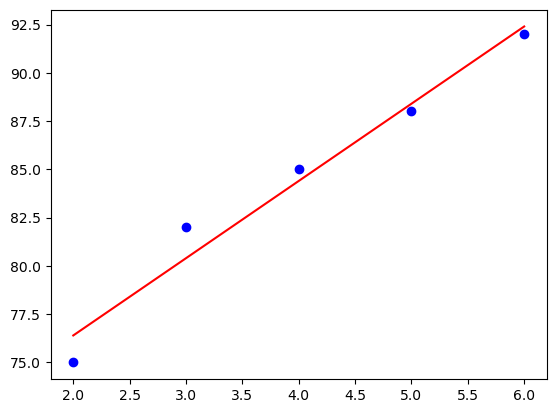

In [11]:
plt.scatter(hours_studied, grades, color='blue', label='Исходные данные')
plt.plot(hours_studied, predicted_grades, color='red', label='Линейная модель')

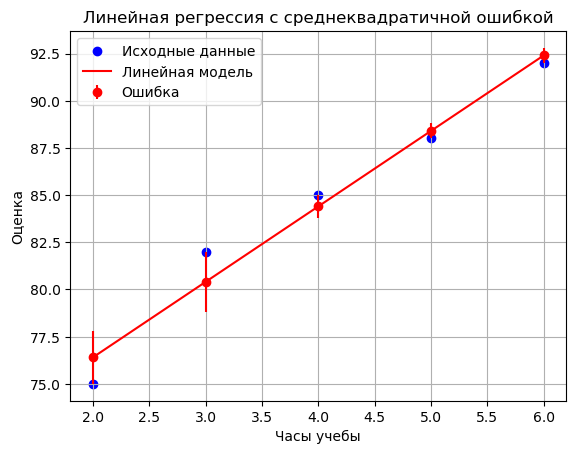

In [15]:
plt.scatter(hours_studied, grades, color='blue', label='Исходные данные')
plt.plot(hours_studied, predicted_grades, color='red', label='Линейная модель')

errors = np.abs(predicted_grades - grades)
plt.errorbar(hours_studied.flatten(), predicted_grades.flatten(), yerr=errors.flatten(), fmt='o', color='red', label='Ошибка')

plt.xlabel('Часы учебы')
plt.ylabel('Оценка')
plt.title('Линейная регрессия с среднеквадратичной ошибкой')
plt.legend()
plt.grid(True)
plt.show()

# Градиентный спуск

In [27]:
# функция ошибок
def mse_loss(X, w, y):
    N = len(y)
    y_pred = X.dot(w)
    return no.sum((y_pred - y)**2) / N

# градиент ошибок
def gradient(X, w, y):
    N = len(y)
    return 2 / N * X.T.dot(X.dot(w) - y)

# Градиентный спуск eta - шаг к локальному экстремуму, epjchs = кол-во итераций, tol - 
def gradient_descent(X, y, eta = 0.01, epochs = 1000, tol = 1e-6):
    w = np.zeros((X.shape[1], 1))
    
    for epoch in range(epochs):
        grad = gradient(X, w, y)
        
        w_new = w - eta * grad
        
        if np.linalg.norm(w_new - w) < tol:
            break
        
        w = w_new
    return w

In [29]:
weights = gradient_descent(X, grades)
print(weights)

[[60.67739221]
 [ 5.72628687]]
